In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import numpy as np

In [48]:
#ready the data
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.shape

(81, 5)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.duplicated().sum()

0

In [6]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [7]:
cars.isnull().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


In [8]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='WT', ylabel='Density'>

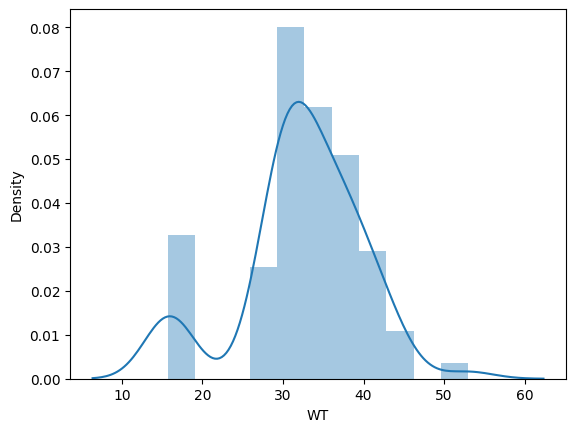

In [9]:
sns.distplot(cars['WT'])

<Axes: xlabel='MPG', ylabel='Density'>

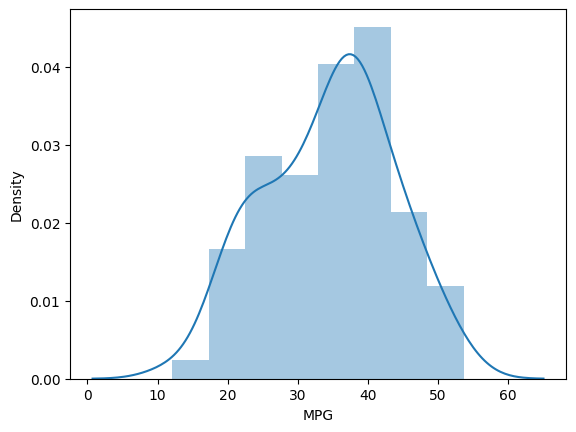

In [10]:
sns.distplot(cars['MPG'])

<Axes: xlabel='HP', ylabel='Density'>

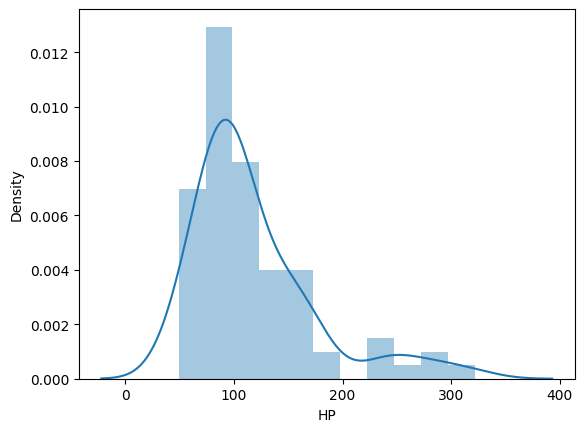

In [11]:
sns.distplot(cars['HP'])

<Axes: xlabel='VOL', ylabel='Density'>

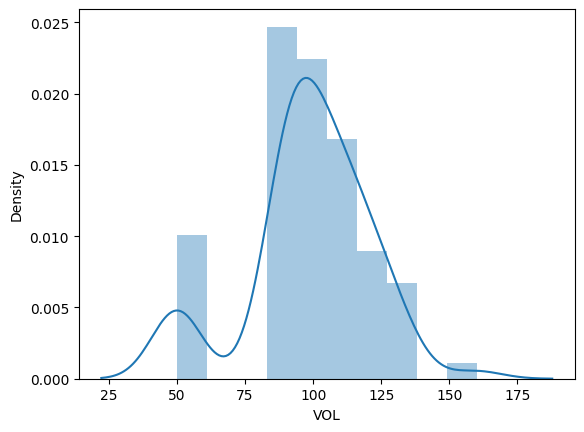

In [12]:
sns.distplot(cars['VOL'])

<Axes: xlabel='SP', ylabel='Density'>

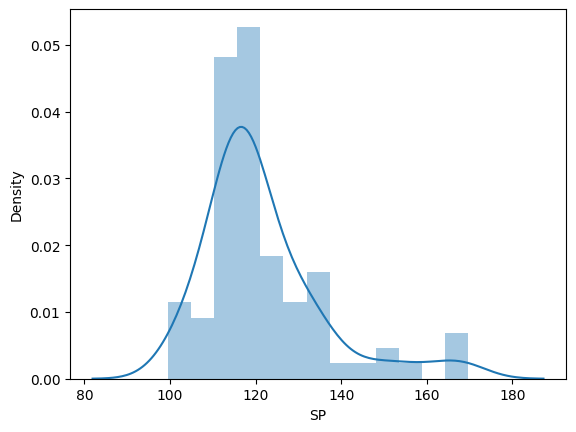

In [13]:
sns.distplot(cars['SP'])

<Axes: ylabel='WT'>

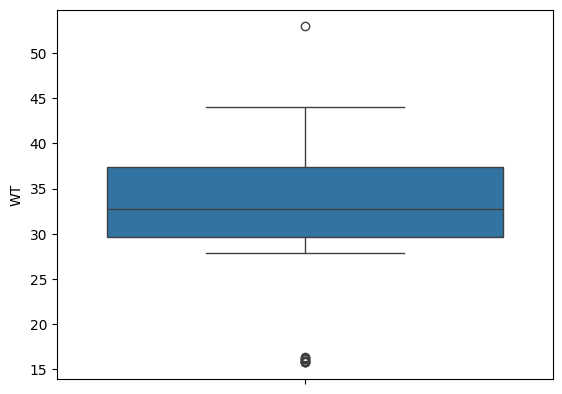

In [14]:
sns.boxplot(cars['WT'])

<Axes: ylabel='MPG'>

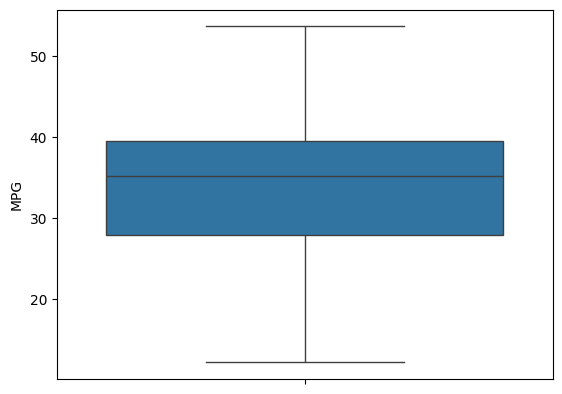

In [15]:
sns.boxplot(cars['MPG'])

<Axes: xlabel='HP'>

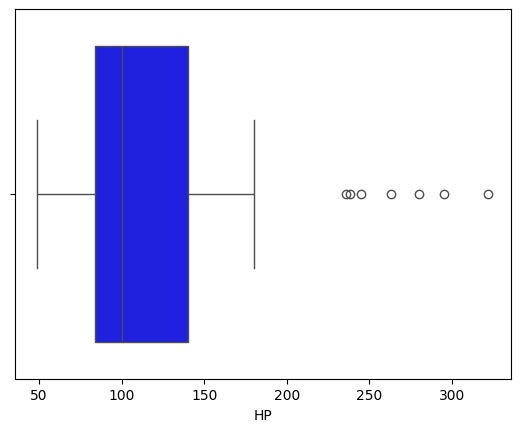

In [16]:
sns.boxplot(x='HP',data=cars,color='blue')

<Axes: ylabel='VOL'>

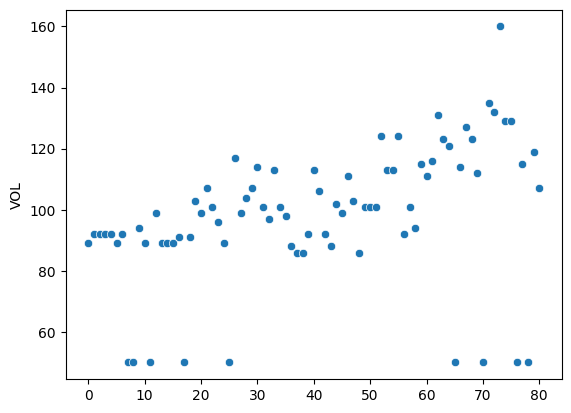

In [17]:
sns.scatterplot(cars['VOL'])

<Axes: xlabel='HP', ylabel='MPG'>

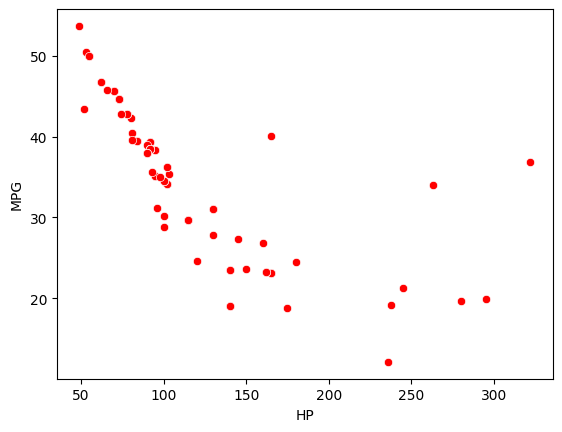

In [18]:
sns.scatterplot(x='HP',y='MPG',color='red',data=cars)

<Axes: xlabel='VOL', ylabel='WT'>

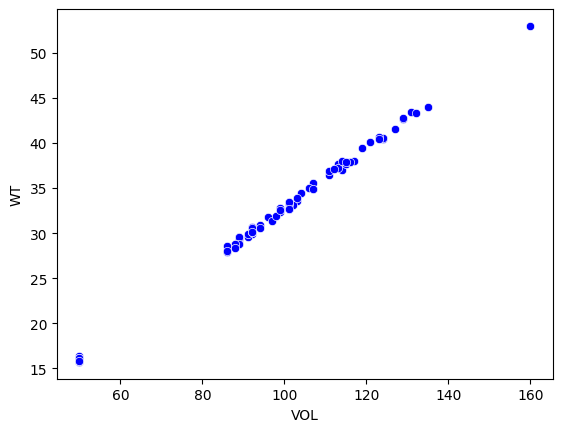

In [19]:
sns.scatterplot(x='VOL',y='WT',color='blue',data=cars)

In [20]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


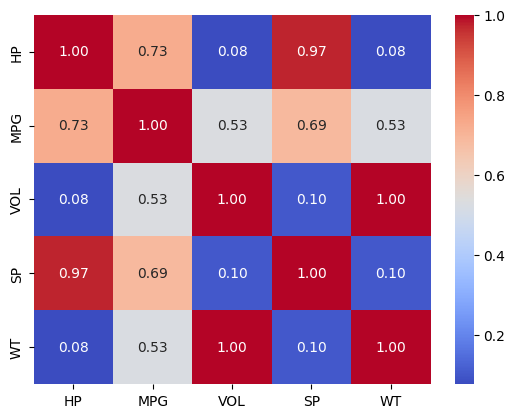

In [27]:
sns.heatmap(np.abs(cars.corr()),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

<Axes: xlabel='HP', ylabel='VOL'>

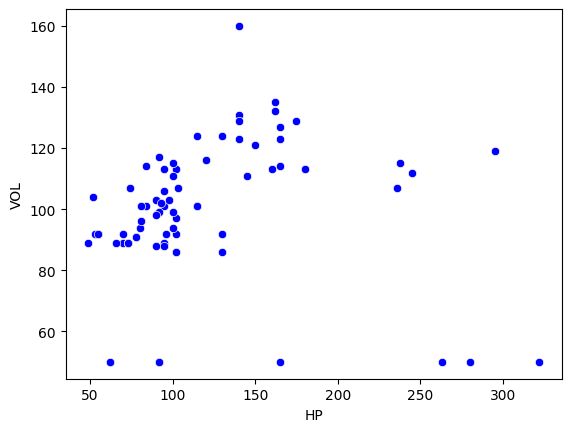

In [26]:
sns.scatterplot(x='HP',y='VOL',color='blue',data=cars)


<Axes: xlabel='HP', ylabel='WT'>

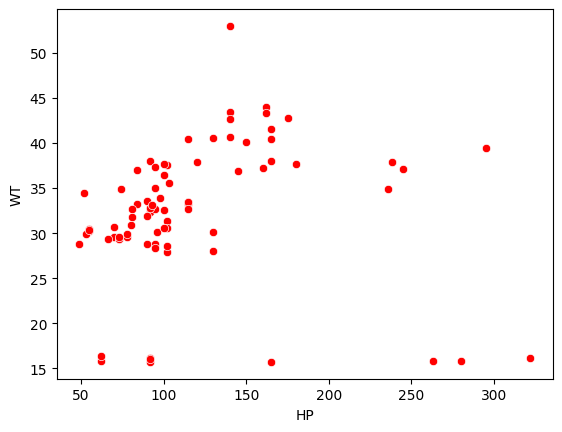

In [23]:
sns.scatterplot(x='HP',y='WT',color='red',data=cars)

<Axes: xlabel='VOL', ylabel='SP'>

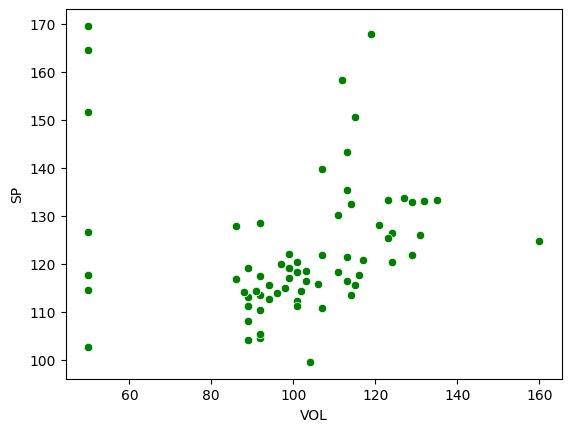

In [24]:
sns.scatterplot(x='VOL',y='SP',color='green',data=cars)

<Axes: xlabel='SP', ylabel='WT'>

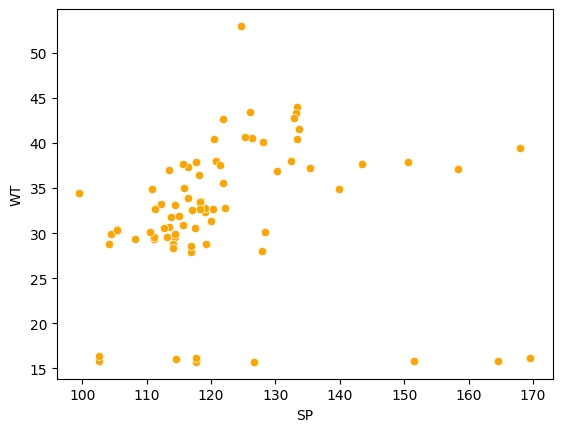

In [25]:
sns.scatterplot(x='SP',y='WT',color='orange',data=cars)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cars[['HP','VOL','WT','SP']]=scaler.fit_transform(cars[['HP','VOL','WT','SP']])

In [33]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,8.100000e+01,81.000000,8.100000e+01,8.100000e+01,8.100000e+01
mean,-6.579099e-17,34.422076,1.021131e-16,1.345974e-15,1.091034e-15
std,1.006231e+00,9.131445,1.006231e+00,1.006231e+00,1.006231e+00
min,-1.206295e+00,12.101263,-2.200268e+00,-1.559242e+00,-2.242651e+00
25%,-5.896621e-01,27.856252,-4.406106e-01,-5.471360e-01,-3.788142e-01
50%,-3.077727e-01,35.152727,1.008224e-01,-2.363888e-01,4.323438e-02
75%,3.969507e-01,39.531633,6.422554e-01,3.451235e-01,6.687709e-01
max,3.603442e+00,53.700681,2.762868e+00,3.409929e+00,2.764440e+00


In [36]:
np.round(cars.describe(),2)

,HP,MPG,VOL,SP,WT
count,81.00,81.00,81.00,81.00,81.00
mean,-0.00,34.42,0.00,0.00,0.00
std,1.01,9.13,1.01,1.01,1.01
min,-1.21,12.10,-2.20,-1.56,-2.24
25%,-0.59,27.86,-0.44,-0.55,-0.38
50%,-0.31,35.15,0.10,-0.24,0.04
75%,0.40,39.53,0.64,0.35,0.67
max,3.60,53.70,2.76,3.41,2.76


In [39]:
import statsmodels.formula.api as smf

ml_v = smf.ols('MPG~VOL', data = cars).fit()
ml_v.rsquared

0.2799008651122705

In [41]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
ml_w.rsquared

0.27747513892701237

In [42]:
ml_v.params

,0
Intercept,34.422076
VOL,-4.801137


In [43]:
ml_v=smf.ols('MPG~SP',data=cars).fit()
ml_v.rsquared

0.4721402334141218

In [44]:
s=ml_v

In [67]:
ml_v=smf.ols('MPG~HP',data=cars).fit()
ml_v.rsquared

0.5256806086282022

In [74]:
import statsmodels.formula.api as smf
ml_v= smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [75]:
ml_v.rsquared

0.7705372737359842

In [76]:
ml_v.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444
